# NOMOR 5
Melakukan test hipotesis 2 sampel, <br>
a. Data kolom fixed acidity dibagi 2 sama rata: bagian awal dan bagian akhir kolom.
Benarkah rata-rata kedua bagian tersebut sama?<br>
b. Data kolom chlorides dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah
rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001?<br>
c. Benarkah rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan
rata-rata 25 baris pertama kolom Sulphates ?<br>
d. Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya?<br>
e. Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar
daripada, proporsi nilai yang sama di setengah bagian akhir alcohol?<br>

In [73]:
import pandas as pd
import scipy.stats as scp
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import proportions_ztest
df = pd.read_csv('../dataset/anggur.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.90,0.4451,0.1813,2.049401,0.070574,16.593818,42.27,0.9982,3.27,0.71,8.64,7
1,8.40,0.5768,0.2099,3.109590,0.101681,22.555519,16.01,0.9960,3.35,0.57,10.03,8
2,7.54,0.5918,0.3248,3.673744,0.072416,9.316866,35.52,0.9990,3.31,0.64,9.23,8
3,5.39,0.4201,0.3131,3.371815,0.072755,18.212300,41.97,0.9945,3.34,0.55,14.07,9
4,6.51,0.5675,0.1940,4.404723,0.066379,9.360591,46.27,0.9925,3.27,0.45,11.49,8


### a. Data kolom fixed acidity dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?
**1. Tentukan nilai hipotesis nol ($H_0$)** <br>
$H_0$: Nilai rata-rata kolom awal fixed acidity sama dengan nilai rata-rata kolom akhir fixed acidity ($\mu_1 - \mu_2 = 0$)

**2. Tentukan hipotesis alternatif ($H_1$)** <br>
$H_1$: Nilai rata-rata kolom awal fixed acidity tidak sama dengan nilai rata-rata kolom akhir fixed acidity ($\mu_1 - \mu_2 \ne 0$)

**3. Tentukan tingkat signifikan** <br>
Tingkat Signifikan $\alpha = 0.05$

**4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.** <br>
Uji statistik: **Two Tailed Mean Test** <br>
Critical section: $z > z_{\alpha/2}$ atau $z < -z_{\alpha/2}$ : $z > z_{0.025}$ atau $z < -z_{0.025}$

**5. Hitung nilai uji statistik** <br>
Hitung nilai z dengan rumus

$$ z = \frac{(\bar{x_1} - \bar{x_2}) - delta}{\sqrt{{\sigma_1^2/n_1} + {\sigma_2^2/n_2}}} $$


Hitung nilai P

**6. KEPUTUSAN : Tolak $H_0$ jika ($z > z_{\alpha/2}$ atau $z < -z_{\alpha/2}$) dan $p < \alpha$**

Nilai z          : 0.02604106999906379
Nilai z(alpha/2) : 1.959963984540054
Nilai p          : 0.9792245804254097
Hipotesis H0 diterima, artinya rata-rata kolom awal fixed acidity sama dengan nilai rata-rata kolom akhir fixed acidity


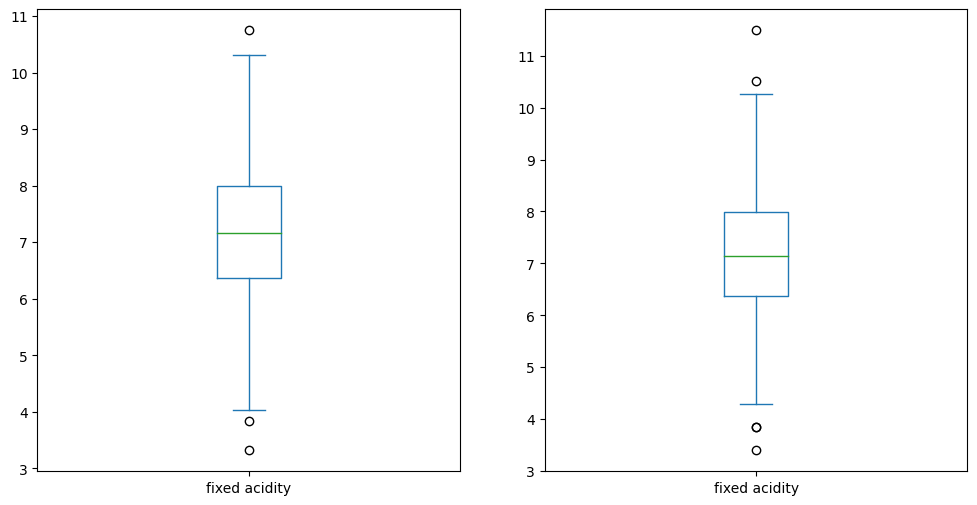

In [74]:
# Initialize constant variables
df_fixed_acidity = df["fixed acidity"]
delta = 0
alpha = 0.05

# Divide fixed acidity into two
df_fixed_acidity_head = df_fixed_acidity[:len(df)//2]
df_fixed_acidity_tail = df_fixed_acidity[len(df)//2:]

# find z and p value
z, p = ztest(df_fixed_acidity_head, df_fixed_acidity_tail, value=delta)

# Find z(alpha/2) value
z_alpha_over_2 = scp.norm.ppf(1-alpha/2)

# Print results
print('Nilai z          : ' + str(z))
print('Nilai z(alpha/2) : ' + str(z_alpha_over_2))
print('Nilai p          : ' + str(p))

if ((z > z_alpha_over_2 or z < -z_alpha_over_2) and p < alpha):
    print('Hipotesis H0 ditolak, artinya rata-rata kolom awal fixed acidity tidak sama dengan nilai rata-rata kolom akhir fixed acidity')
else :
    print('Hipotesis H0 diterima, artinya rata-rata kolom awal fixed acidity sama dengan nilai rata-rata kolom akhir fixed acidity')

# Plot each side
plt.subplot(1, 2, 1)
df_fixed_acidity_head.plot(kind="box", figsize=(12, 6))
plt.subplot(1, 2, 2)
df_fixed_acidity_tail.plot(kind="box", figsize=(12, 6))
plt.show()

### b. Data kolom chlorides dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001?

**1. Tentukan nilai hipotesis nol ($H_0$)** <br>
$H_0$: Nilai rata-rata kolom chlorides bagian awal lebih besar daripada bagian akhir sebesar 0.001 ($\mu_1 - \mu_2 = 0.001$)

**2. Tentukan hipotesis alternatif ($H_1$)** <br>
$H_1$: Nilai rata-rata kolom chlorides bagian awal tidak lebih besar daripada bagian akhir sebesar 0.001 ($\mu_1 - \mu_2 \ne 0.001$)

**3. Tentukan tingkat signifikan** <br>
Tingkat Signifikan $\alpha = 0.05$

**4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.** <br>
Uji statistik: **Two Tailed Mean Test** <br>
Critical section: $z > z_{\alpha/2}$ atau $z < -z_{\alpha/2}$ : $z > z_{0.025}$ atau $z < -z_{0.025}$

**5. Hitung nilai uji statistik** <br>
Hitung nilai z dengan rumus

$$ z = \frac{(\bar{x_1} - \bar{x_2}) - delta}{\sqrt{{\sigma_1^2/n_1} + {\sigma_2^2/n_2}}} $$


Hitung nilai P

**6. KEPUTUSAN : Tolak $H_0$ jika ($z > z_{\alpha/2}$ atau $z < -z_{\alpha/2}$) dan $p < \alpha$**

Nilai z          : -0.467317122852132
Nilai z(alpha/2) : 1.959963984540054
Nilai p          : 0.640273007581107
Hipotesis H0 diterima, artinya rata-rata kolom chlorides bagian awal lebih besar daripada bagian akhir sebesar 0.001


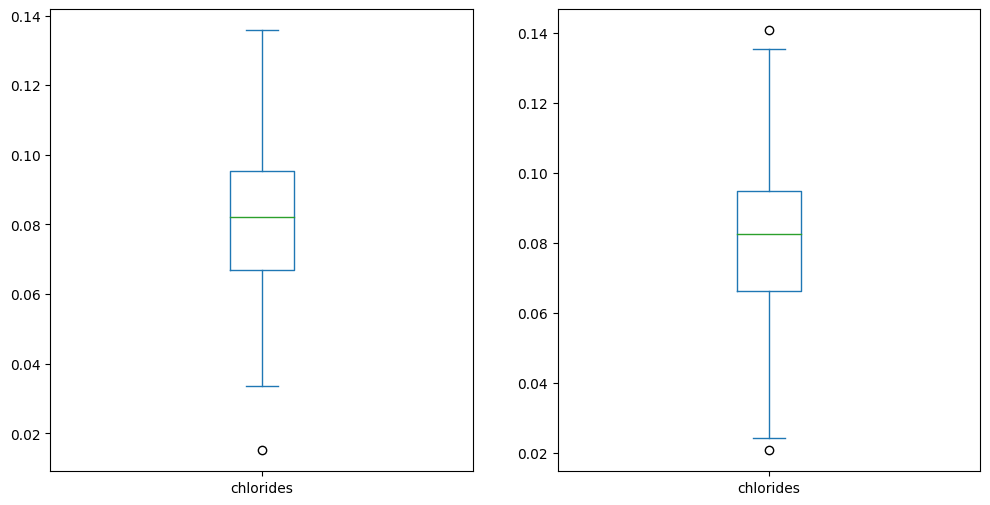

In [75]:
# Initialize constant variables
df_chlorides = df["chlorides"]
delta = 0.001
alpha = 0.05

# Divide chlorides column into two
df_chlorides_head = df_chlorides[:len(df)//2]
df_chlorides_tail = df_chlorides[len(df)//2:]

# find z and p value
z, p = ztest(df_chlorides_head, df_chlorides_tail, value=delta)

# Find z(alpha/2) value
z_alpha_over_2 = scp.norm.ppf(1-alpha/2)

# Print results
print('Nilai z          : ' + str(z))
print('Nilai z(alpha/2) : ' + str(z_alpha_over_2))
print('Nilai p          : ' + str(p))

if ((z > z_alpha_over_2 or z < -z_alpha_over_2) and p < alpha):
    print('Hipotesis H0 ditolak, artinya rata-rata kolom chlorides bagian awal tidak lebih besar daripada bagian akhir sebesar 0.001')
else :
    print('Hipotesis H0 diterima, artinya rata-rata kolom chlorides bagian awal lebih besar daripada bagian akhir sebesar 0.001')

# Plot each side
plt.subplot(1, 2, 1)
df_chlorides_head.plot(kind="box", figsize=(12, 6))
plt.subplot(1, 2, 2)
df_chlorides_tail.plot(kind="box", figsize=(12, 6))
plt.show()

### c. Benarkah rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata-rata 25 baris pertama kolom Sulphates ?

**1. Tentukan nilai hipotesis nol ($H_0$)** <br>
$H_0$: Nilai rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata-rata 25 baris pertama kolom Sulphates ($\mu_1 - \mu_2 = 0$)

**2. Tentukan hipotesis alternatif ($H_1$)** <br>
$H_1$: Nilai rata-rata sampel 25 baris pertama kolom Volatile Acidity tidak sama dengan rata-rata 25 baris pertama kolom Sulphates ($\mu_1 - \mu_2 \ne 0$)

**3. Tentukan tingkat signifikan** <br>
Tingkat Signifikan $\alpha = 0.05$

**4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.** <br>
Uji statistik: **Two Tailed Mean Test** <br>
Critical section: $z > z_{\alpha/2}$ atau $z < -z_{\alpha/2}$ : $z > z_{0.025}$ atau $z < -z_{0.025}$

**5. Hitung nilai uji statistik** <br>
Hitung nilai z dengan rumus

$$ z = \frac{(\bar{x_1} - \bar{x_2}) - delta}{\sqrt{{\sigma_1^2/n_1} + {\sigma_2^2/n_2}}} $$


Hitung nilai P

**6. KEPUTUSAN : Tolak $H_0$ jika ($z > z_{\alpha/2}$ atau $z < -z_{\alpha/2}$) dan $p < \alpha$**

Nilai z          : -2.6374821676748703
Nilai z(alpha/2) : 1.959963984540054
Nilai p          : 0.008352401685453743
Hipotesis H0 ditolak, artinya rata-rata sampel 25 baris pertama kolom Volatile Acidity tidak sama dengan rata-rata 25 baris pertama kolom Sulphates


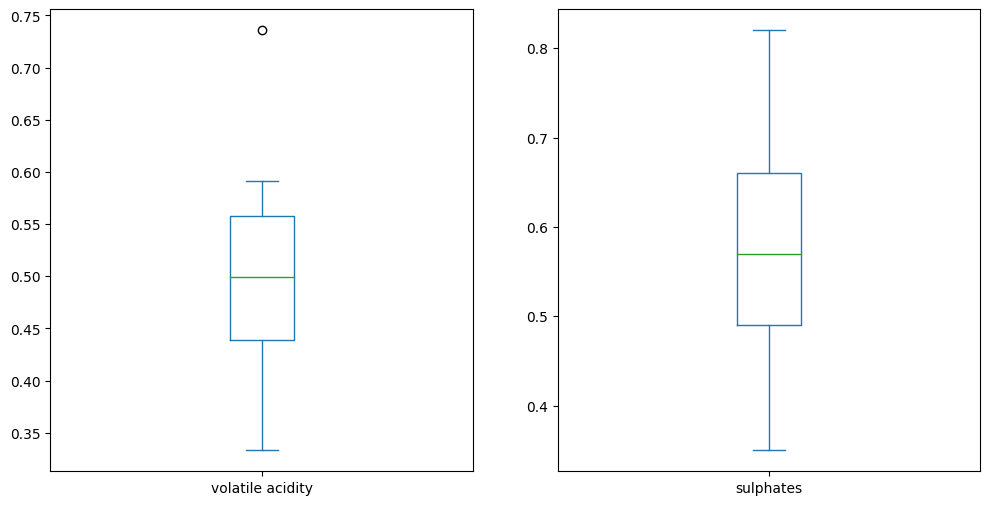

In [76]:
# Initialize constant variables
df_first_25_volatile_acidity = df.loc[0:24, 'volatile acidity']
df_first_25_sulphates = df.loc[0:24, 'sulphates']

delta = 0
alpha = 0.05

# Find z and p value
z, p = ztest(df_first_25_volatile_acidity, df_first_25_sulphates, value=delta)

# Find z(alpha/2) value
z_alpha_over_2 = scp.norm.ppf(1-alpha/2)

# Print results
print('Nilai z          : ' + str(z))
print('Nilai z(alpha/2) : ' + str(z_alpha_over_2))
print('Nilai p          : ' + str(p))

if ((z > z_alpha_over_2 or z < -z_alpha_over_2) and p < alpha):
    print('Hipotesis H0 ditolak, artinya rata-rata sampel 25 baris pertama kolom Volatile Acidity tidak sama dengan rata-rata 25 baris pertama kolom Sulphates')
else :
    print('Hipotesis H0 diterima, artinya rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata-rata 25 baris pertama kolom Sulphates')

# Plot each side
plt.subplot(1, 2, 1)
df_first_25_volatile_acidity.plot(kind="box", figsize=(12, 6))
plt.subplot(1, 2, 2)
df_first_25_sulphates.plot(kind="box", figsize=(12, 6))
plt.show()

### d. Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya?

**1. Tentukan nilai hipotesis nol ($H_0$)** <br>
$H_0$: Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya ($\sigma^2_1 - \sigma^2_2 = 0$)

**2. Tentukan hipotesis alternatif ($H_1$)** <br>
$H_1$: Bagian awal kolom residual sugar tidak memiliki variansi yang sama dengan bagian akhirnya ($\sigma^2_1 - \sigma^2_2 \ne 0$)

**3. Tentukan tingkat signifikan** <br>
Tingkat Signifikan $\alpha = 0.05$

**4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.** <br>
Uji statistik: **Two Tailed Variance Test** <br>
Critical section: $f < f_{1-\alpha/2}(v_1, v_2)$ atau $f > f_{\alpha/2}(v_1, v_2)$

**5. Hitung nilai uji statistik** <br>
Hitung nilai z dengan rumus

$$ f = \frac{s_1^2}{s_2^2} $$

dengan

$$ v_1 = n_1 - 1, v_2 = n_2 - 2$$


Hitung nilai P

**6. KEPUTUSAN : Tolak $H_0$ jika ($f < f_{1-\alpha/2}(v_1, v_2)$ atau $f > f_{\alpha/2}(v_1, v_2)$) dan $p < \alpha$**

Nilai f          : 0.9420041066941615
Nilai f upper    : 1.1920574017201653
Nilai f lower    : 0.8388857772763105
Nilai p          : 0.2524101797623089
Hipotesis H0 diterima, artinya bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya


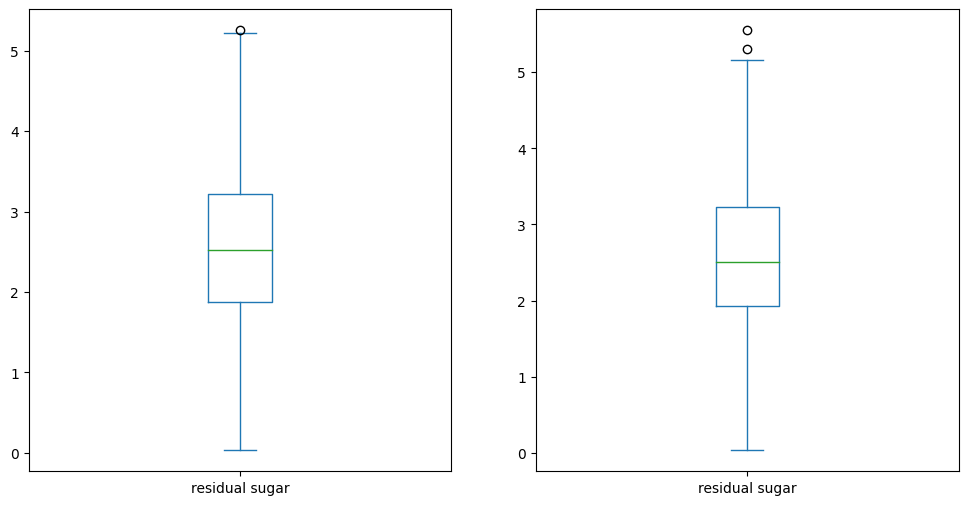

In [77]:
# Initialize constant variables
df_residual_sugar = df["residual sugar"]
alpha = 0.05

# Divide residual sugar column into two
df_residual_sugar_head = df_residual_sugar[:len(df)//2]
df_residual_sugar_tail = df_residual_sugar[len(df)//2:]

# Find degrees of freedom for head and tail
v_head = len(df_residual_sugar_head) - 1
v_tail = len(df_residual_sugar_tail) - 1

# Calculate f value
f = df_residual_sugar_head.var() / df_residual_sugar_tail.var()
f_upper = scp.f.ppf(1 - alpha/2, v_head, v_tail)
f_lower = scp.f.ppf(alpha/2, v_head, v_tail)

# Find z and p value
p = scp.f.cdf(f, v_head, v_tail)

# Print results
print('Nilai f          : ' + str(f))
print('Nilai f upper    : ' + str(f_upper))
print('Nilai f lower    : ' + str(f_lower))
print('Nilai p          : ' + str(p))

if ((f > f_lower or f < f_upper) and p < alpha):
    print('Hipotesis H0 ditolak, artinya bagian awal kolom residual sugar tidak memiliki variansi yang sama dengan bagian akhirnya')
else :
    print('Hipotesis H0 diterima, artinya bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya')

# Plot each side
plt.subplot(1, 2, 1)
df_residual_sugar_head.plot(kind="box", figsize=(12, 6))
plt.subplot(1, 2, 2)
df_residual_sugar_tail.plot(kind="box", figsize=(12, 6))
plt.show()

### e. Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol?

**1. Tentukan nilai hipotesis nol ($H_0$)** <br>
$H_0$: Proporsi nilai setengah bagian awal alcohol yang lebih dari 7 sama dengan proporsi nilai yang sama di setengah bagian akhir alcohol $(P(X_{head}>7) = P(X_{tail}>7))$

**2. Tentukan hipotesis alternatif ($H_1$)** <br>
$H_1$: Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol $(P(X_{head}>7) > P(X_{tail}>7))$

**3. Tentukan tingkat signifikan** <br>
Tingkat Signifikan $\alpha = 0.05$

**4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.** <br>
Uji statistik: **One Tailed Proportion Test** <br>
Critical section: $z > z_{alpha}$

**5. Hitung nilai uji statistik** <br>
Hitung nilai z dengan rumus

$$ z = \frac{\hat{p_1} - \hat{p_2}}{\sqrt{\hat{p}\hat{q}({1/n_1} + {1/n_2})}} $$

dengan

$$ \hat{p} = \frac{x_1 + x_2}{n_1 + n_2}, \hat{q} = 1 - \hat{p}$$


Hitung nilai P

**6. KEPUTUSAN : Tolak $H_0$ jika $z > z_{alpha}$ dan $p < \alpha$**

Nilai z          : 0.0
Nilai p          : 0.5
Hipotesis H0 diterima, artinya proporsi nilai setengah bagian awal alcohol yang lebih dari 7 sama dengan proporsi nilai yang sama di setengah bagian akhir alcohol


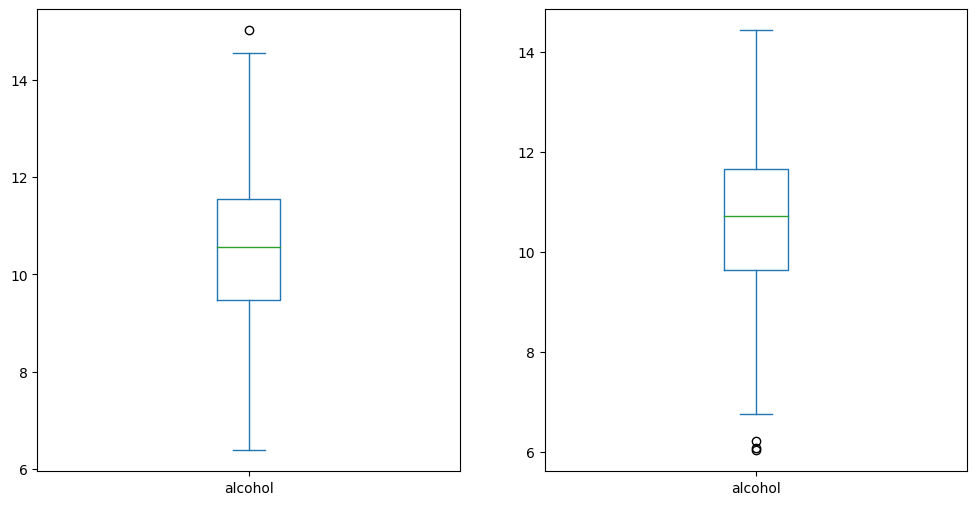

In [83]:
# Initialize constant variables
df_alcohol = df["alcohol"]
alpha = 0.05

# Divide alcohol column into two
df_alcohol_head = df_alcohol[:len(df)//2]
df_alcohol_tail = df_alcohol[len(df)//2:]

# Calculate the proportion of alcohol values greater than 7 in each half
sum_alcohol_greater_than_7 = [sum(df_alcohol_head > 7), sum(df_alcohol_tail > 7)]
sum_alcohol = [len(df_alcohol_head), len(df_alcohol_tail)]
z, p = proportions_ztest(sum_alcohol_greater_than_7, sum_alcohol, alternative='larger')

# Find z alpha value
z_alpha = scp.norm.ppf(1-alpha)

# Print results
print('Nilai z          : ' + str(z))
print('Nilai p          : ' + str(p))

if (z > z_alpha and p < alpha):
    print('Hipotesis H0 ditolak, artinya proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol')
else :
    print('Hipotesis H0 diterima, artinya proporsi nilai setengah bagian awal alcohol yang lebih dari 7 sama dengan proporsi nilai yang sama di setengah bagian akhir alcohol')

# Plot each side
plt.subplot(1, 2, 1)
df_alcohol_head.plot(kind="box", figsize=(12, 6))
plt.subplot(1, 2, 2)
df_alcohol_tail.plot(kind="box", figsize=(12, 6))
plt.show()